In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("Flight_Price_Data_Train.xlsx")   
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [4]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

From above we can see that only ONE null value is present in 'Route' & 'Total_Stops'. We can drop these rows as there are only 2 rows with Null Values.

In [5]:
df.dropna(axis=0, inplace = True)            # Removing Rows with Null Values

In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

We can see that now the Null Values have been removed.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


HANDLING "Date_of_Journey" COLUMN

Also, we can see from above that the Input column 'Date_of_Journey','Dep_Time' & 'Arrival_Time' is being taken as object type Data. Which is not correct. So, Changing these Column into timestamp DataType.

Also, making separate columns for Day, Month, Hours & Mins for using in M.L Models & Better Data Vizualization.

In [8]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y")
df['Journey_Month']=df['Date_of_Journey'].apply(lambda x:x.month)
df['Journey_Day']=df['Date_of_Journey'].apply(lambda x:x.day)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1


HANDLING "Dep_Time" COLUMN

In [9]:
df['Dep_Hour']=pd.to_datetime(df['Dep_Time']).apply(lambda x:x.hour)
df['Dep_Min']=pd.to_datetime(df['Dep_Time']).apply(lambda x:x.minute)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


In [10]:
# Now we can drop Dep_Time column as we have made separate columns for Dep_Hour & Dep_Min.

df.drop('Dep_Time',axis=1,inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50


HANDLING "Arrival_Time" COLUMN

In [11]:
df['Arrival_Hour']=pd.to_datetime(df['Arrival_Time']).apply(lambda x:x.hour)
df['Arrival_Min']=pd.to_datetime(df['Arrival_Time']).apply(lambda x:x.minute)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


In [12]:
# Now we can drop Arrival_Time column as we have made separate columns for Arrival_Hour & Arrival_Min.

df.drop('Arrival_Time',axis=1,inplace=True)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35


HANDLING "Duration" COLUMN

We can see that the Duration Column contains duration in Hours & Minute both. So coverting the Whole Duration Column only in terms of Minutes for M.L. Model.

In [13]:
df['Duration'] = df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,3,24,22,20,1,10
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Duration         10682 non-null  int64         
 6   Total_Stops      10682 non-null  object        
 7   Additional_Info  10682 non-null  object        
 8   Price            10682 non-null  int64         
 9   Journey_Month    10682 non-null  int64         
 10  Journey_Day      10682 non-null  int64         
 11  Dep_Hour         10682 non-null  int64         
 12  Dep_Min          10682 non-null  int64         
 13  Arrival_Hour     10682 non-null  int64         
 14  Arrival_Min      10682 non-null  int64

We can see that Date_of_Journey is now converted in datetime format.

In [15]:
df.describe()

,Duration,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,643.020502,9087.214567,4.708575,13.509081,12.491013,24.409287,13.349186,24.690601
std,507.830133,4611.548810,1.164408,8.479363,5.748820,18.767801,6.859317,16.506808
min,5.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,5277.000000,3.000000,6.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,8372.000000,5.000000,12.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,12373.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,79512.000000,6.000000,27.000000,23.000000,55.000000,23.000000,55.000000


OBERVATIONS : -
   1. Duration & Price Column are right skewed as the Mean>Median.
   2. Also, ouliers are present in Duration & Price Column. As there is huge difference b/w 75th percentile & max of the column.
   3. We can see that the Average Price of the Flight is around 9000-10000 & Average duration of the flight is around 640-650mins. 

# Exploratory Data Analysis & Visualization¶

UNIVARIATE ANALYSIS

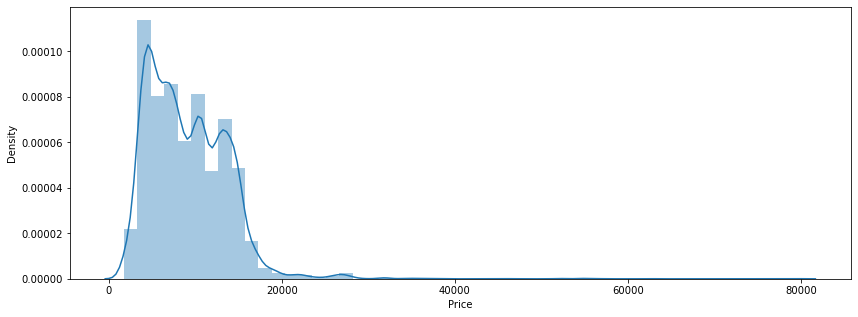

In [16]:
plt.figure(figsize=(14,5))
sns.distplot(df['Price'])
plt.show()

We can see that the average flight price across India is b/w 9000-10000.

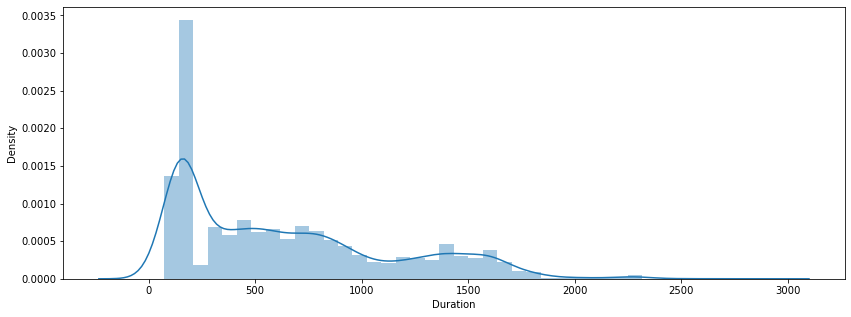

In [17]:
plt.figure(figsize=(14,5))
sns.distplot(df['Duration'])
plt.show()

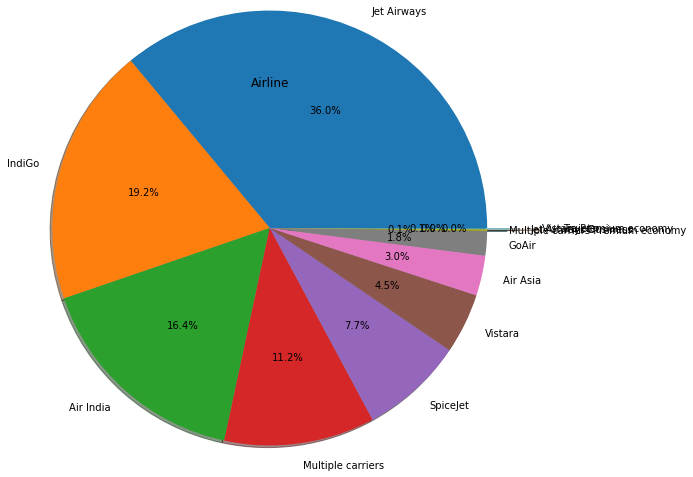

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64


In [18]:
lb = df['Airline'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=2.0,explode=[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.20, 0.30, 0.50], shadow=True, autopct='%1.1f%%')
plt.title("Airline")
plt.show()
print(df['Airline'].value_counts())

We can see that among the flights Operated from March'19 - June'19. Jet Airways has the highest highest majority of flights 36.0% followed by Indigo(19.2%) & Air India(16.4%). 

Also, Trujet, Vistara Premium economy & Jet Airways Business had the least no of flights during this period. 

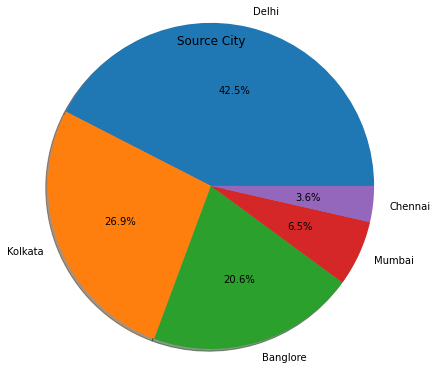

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64


In [19]:
lb = df['Source'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, shadow=True, autopct='%1.1f%%')
plt.title("Source City")
plt.show()
print(df['Source'].value_counts())

From above we can see that the Maximum no. of flights during March'19 - June'19 were from Delhi(42.5%) followed by Kolkata(26.9%). Whereas Chennai had the least No. of flights(3.6%) operated during this period.

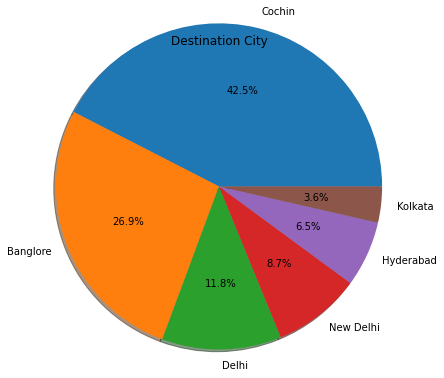

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64


In [20]:
lb = df['Destination'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5, shadow=True, autopct='%1.1f%%')
plt.title("Destination City")
plt.show()
print(df['Destination'].value_counts())

From above we can see that the maximum no. of flights b/w March'19 - June'19 were to Cochin(42.5%) followed by banglore(26.9%). Whereas flights to Kolkata were least in Numbers(3.6%). 

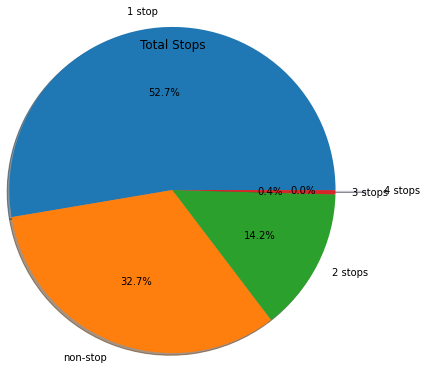

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64


In [21]:
lb = df['Total_Stops'].value_counts()
plt.figure(figsize=(10,5))
plt.pie(lb.values, labels=lb.index, radius=1.5,explode=[0, 0, 0, 0, 0.3], shadow=True, autopct='%1.1f%%')
plt.title("Total Stops")
plt.show()
print(df['Total_Stops'].value_counts())

From above we can see that the Maximum fligts operated during March'19 - June'19 period had only 1 Stop(52.7%) followed by the flights with No Stops(32.7%).

Whereas, only one flight had 4 stops during this period. while 0.4% of the flights had 3 stops in their Route.

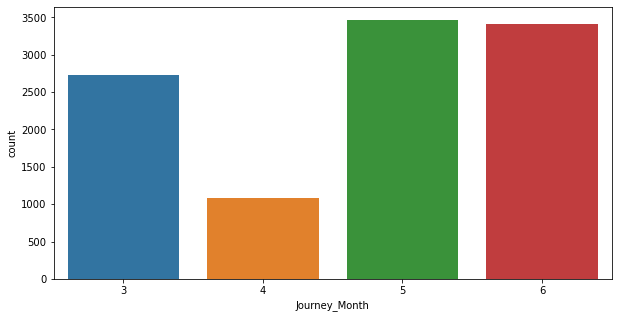

5    3465
6    3414
3    2724
4    1079
Name: Journey_Month, dtype: int64


In [22]:
plt.figure(figsize=(10,5))
sns.countplot(x='Journey_Month',data=df)
plt.show()
print(df['Journey_Month'].value_counts())

From above we can see that most of the flights we scheduled during May-June Period.

BIVARIATE ANALYSIS

<function matplotlib.pyplot.show(close=None, block=None)>

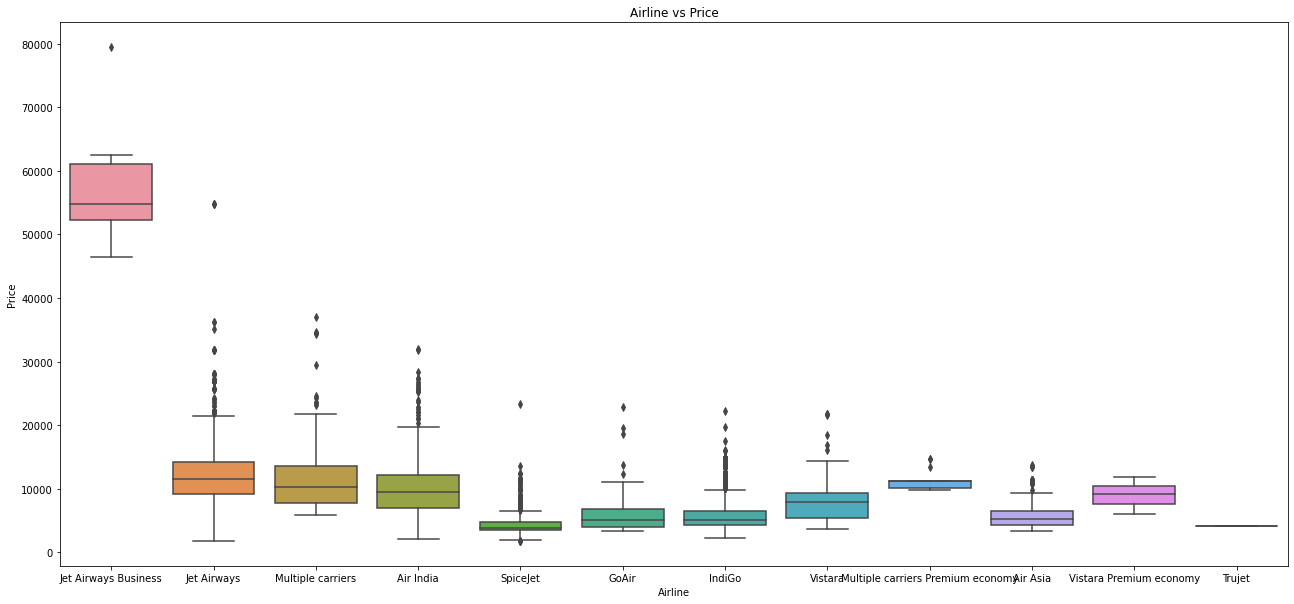

In [23]:
plt.figure(figsize=(22,10))
sns.boxplot(x='Airline',y='Price',data=df.sort_values("Price",ascending=False))
plt.title("Airline vs Price")
plt.show

We can see that the Flight prices for Jet Airways Businesss is very high as compared to other carriers. The nest highest pricing is for Jet Airways Flights.

Whereas the cheapest flights are for Trujet Airline.

<function matplotlib.pyplot.show(close=None, block=None)>

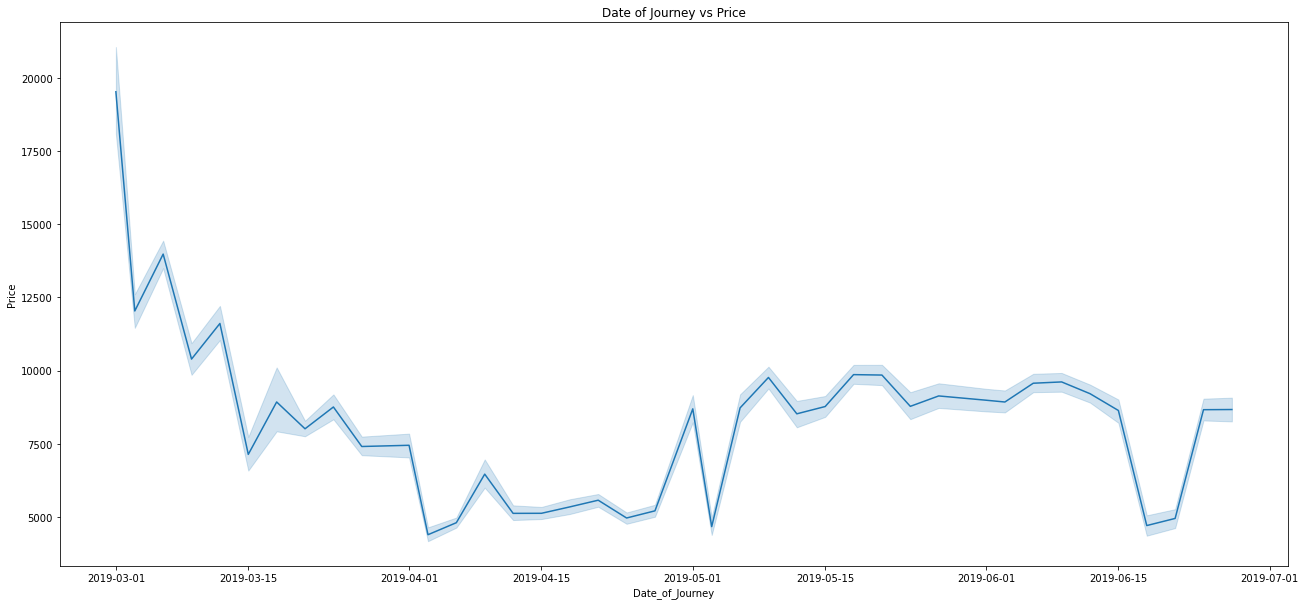

In [24]:
plt.figure(figsize=(22,10))
sns.lineplot(x='Date_of_Journey',y='Price',data=df)
plt.title("Date of Journey vs Price")
plt.show

We can see that the Highest Price of flight tickets is recorded in Mar'19. Which gradually decrases over the month. 

Whereas, the lowest price is recorded in April'19 starting.

<function matplotlib.pyplot.show(close=None, block=None)>

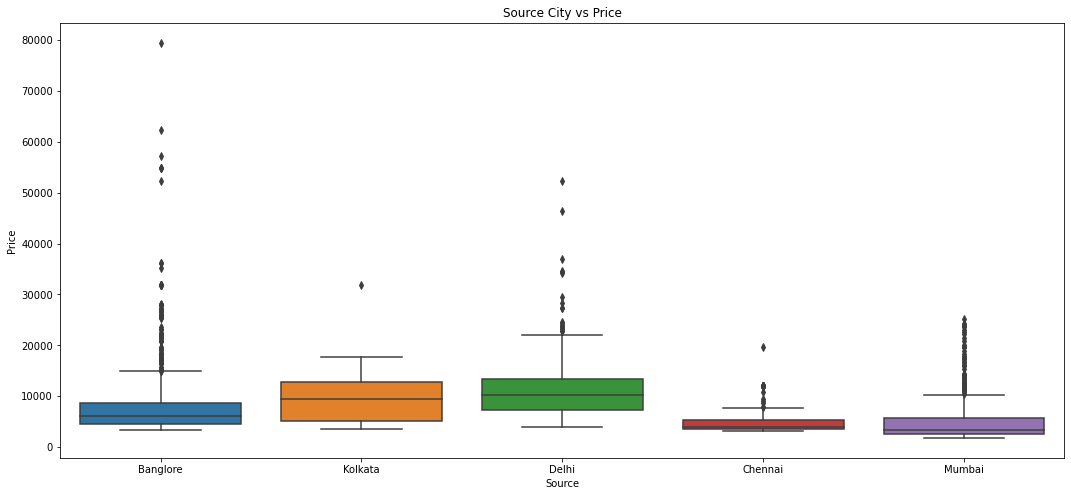

In [25]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Source',y='Price',data=df)
plt.title("Source City vs Price")
plt.show

From above we can see that the Average prices of Flights Starting from Delhi are highest, followed by Kolkata & Banglore.

<function matplotlib.pyplot.show(close=None, block=None)>

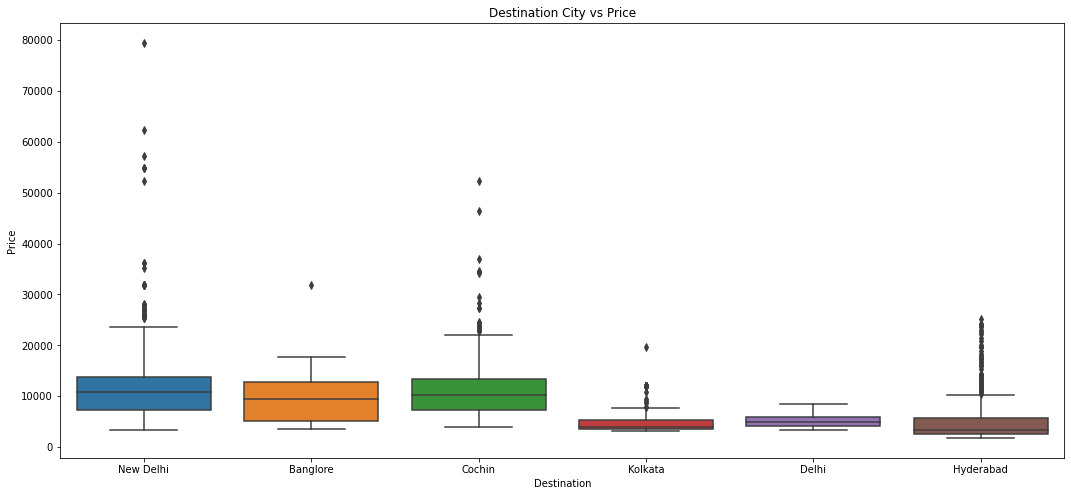

In [26]:
plt.figure(figsize=(18,8))
sns.boxplot(x='Destination',y='Price',data=df)
plt.title("Destination City vs Price")
plt.show

From above plot we can see that the Flights scheduled for New Delhi as Destination have The Highest Average Prices followed by the flights travelling to Cochin & Banglore.

<function matplotlib.pyplot.show(close=None, block=None)>

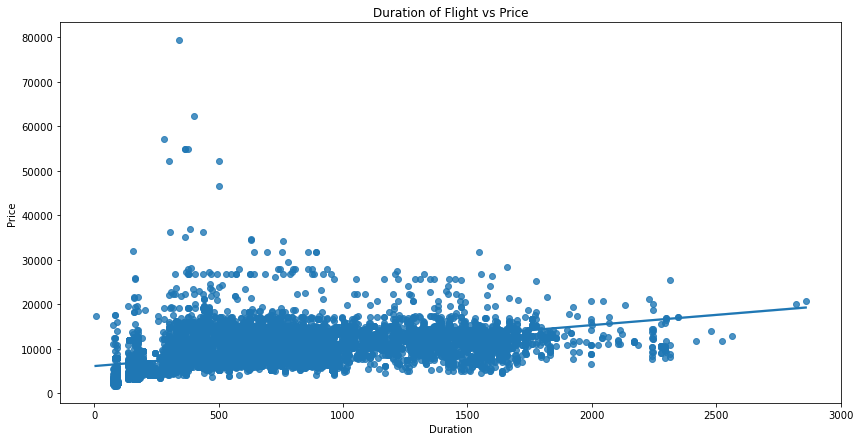

In [27]:
plt.figure(figsize=(14,7))
sns.regplot(x='Duration',y='Price',data=df)
plt.title("Duration of Flight vs Price")
plt.show

From above plot we can see that as the Duration of the Flight increases the Prices of the Airlines are also increasing.

We can say that the Duration & Price of the Flightd are showing +ve correlation with each other.

<function matplotlib.pyplot.show(close=None, block=None)>

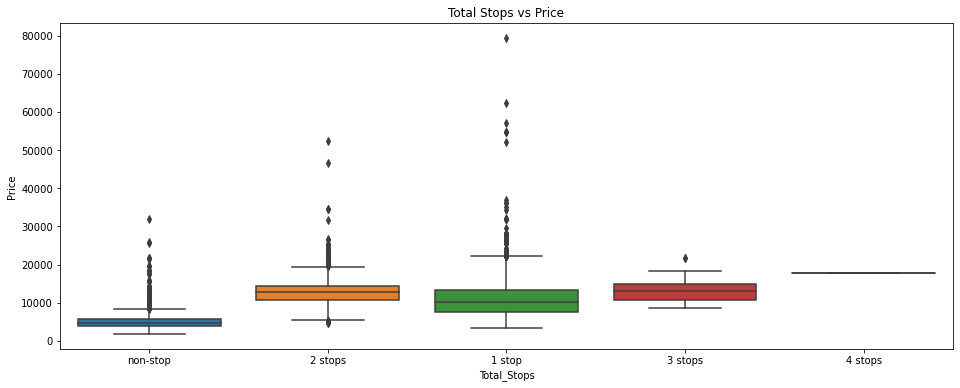

In [28]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Total_Stops',y='Price',data=df)
plt.title("Total Stops vs Price")
plt.show

From above plot we can see that More the No. of stops in the route more is the Price of the Flights.

Flights that are Non-Stop have least Prices followed by flights with only 1 stop. Whereas the Flights with 4 or 3 Stops have the Highest Prices.

<function matplotlib.pyplot.show(close=None, block=None)>

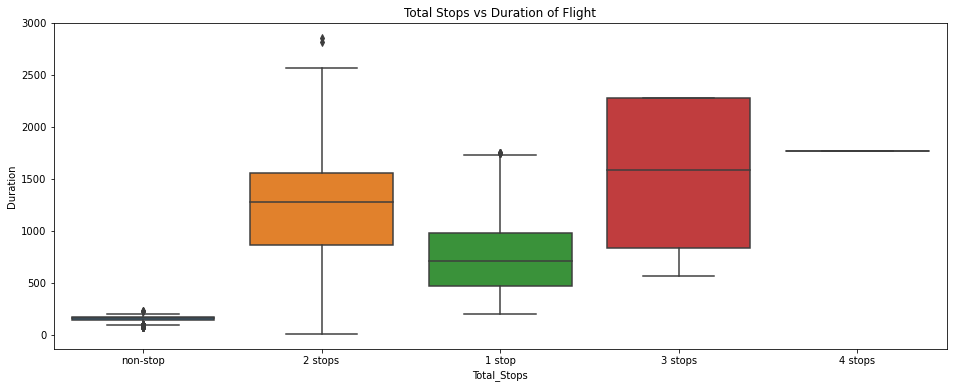

In [29]:
plt.figure(figsize=(16,6))
sns.boxplot(x='Total_Stops',y='Duration',data=df)
plt.title("Total Stops vs Duration of Flight")
plt.show

From above plot we can see that the More the No. of Stops in the Route the More is the Duration of the Fligt. 

<function matplotlib.pyplot.show(close=None, block=None)>

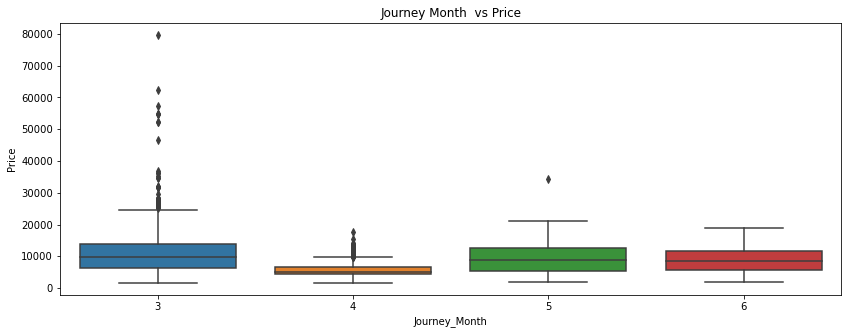

In [30]:
plt.figure(figsize=(14,5))
sns.boxplot(x='Journey_Month',y='Price',data=df)
plt.title("Journey Month  vs Price")
plt.show

We can see that the Highest Flight Prices are recored in the Month of March whereas the Lowest flight prices were in the month of April.

# Multi-Variate Analysis

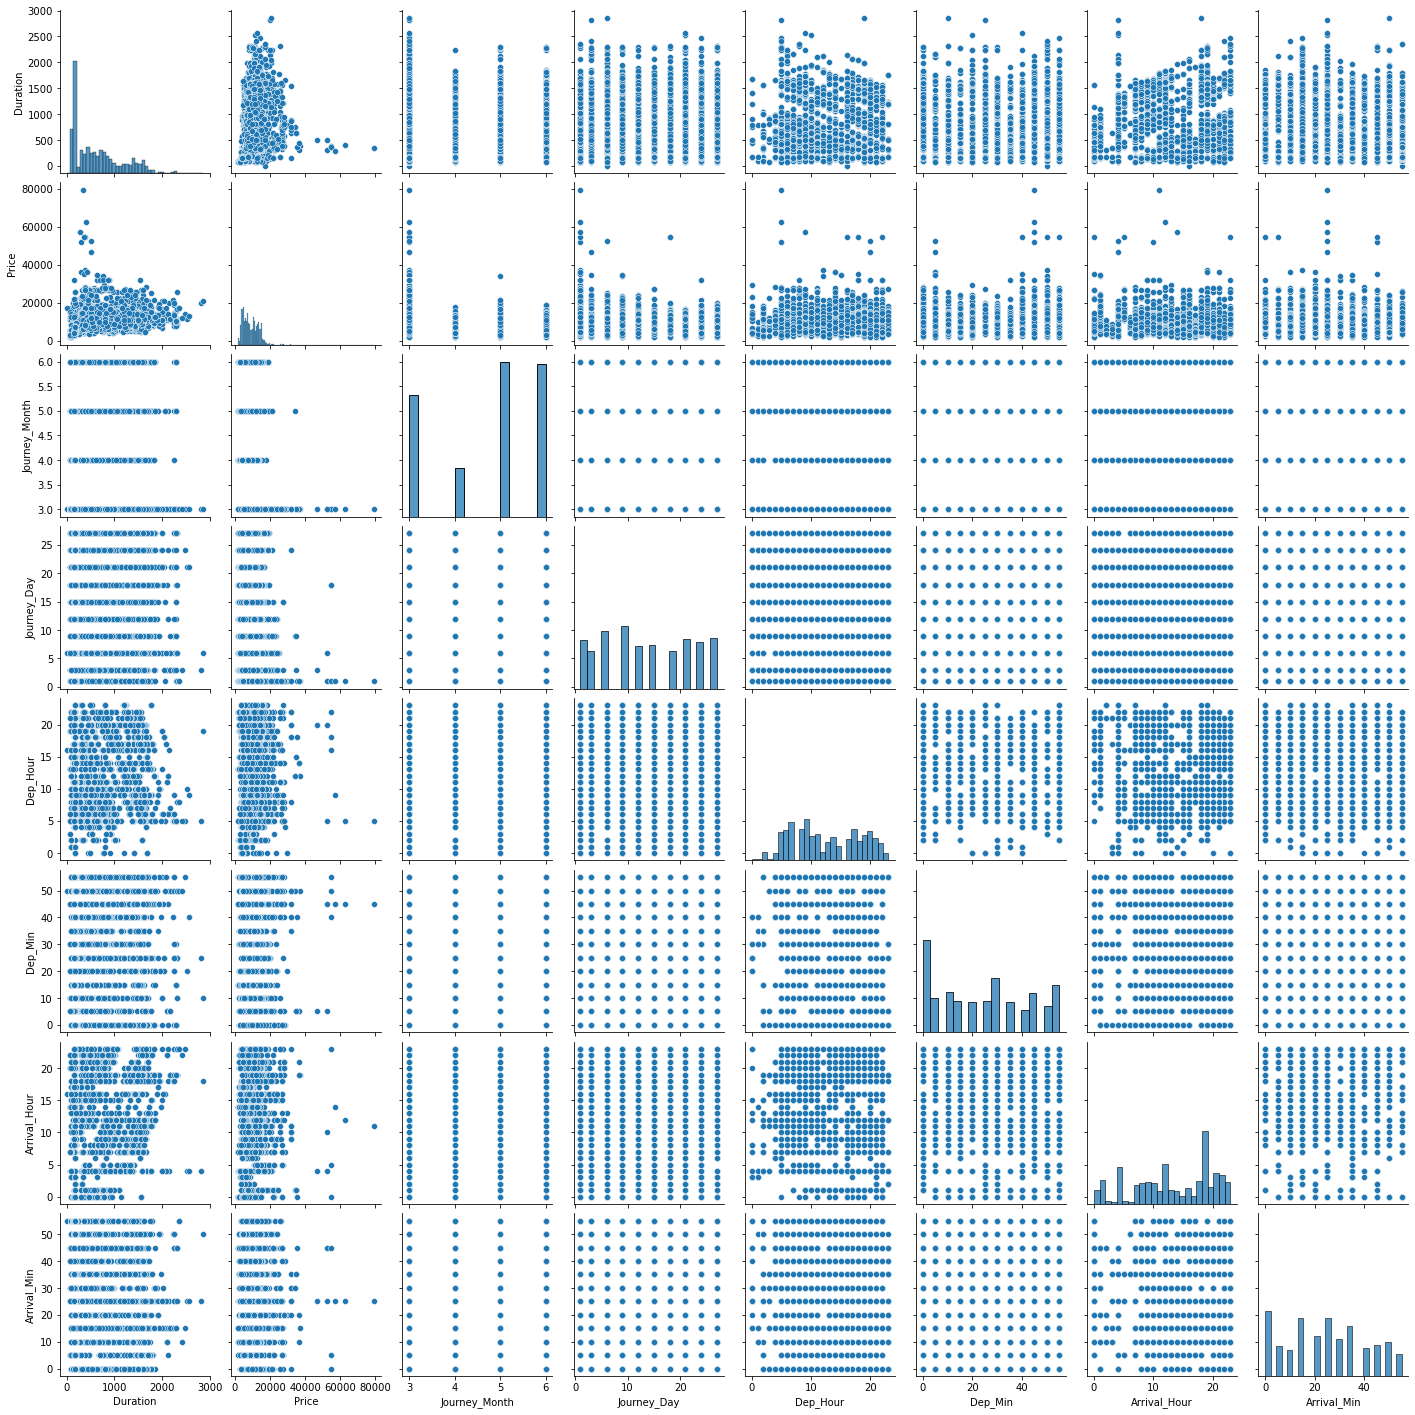

In [31]:
sns.pairplot(df)

# Data Preparation

In [32]:
# Since we have made separate columns for Journey Day & Journey Month. We will drop Date_of_Journey column.

df.drop('Date_of_Journey',axis=1,inplace=True)

In [33]:
# Dropping Route & Additional_Info Column as these columns don't contain any usefull information of the M.L. Model.  
# Maximum column in Additional_Info have No info in them
# And for Route Column Total Stops is already present in the DataSet

df.drop({'Route','Additional_Info'},axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,170,non-stop,3897,3,24,22,20,1,10
1,Air India,Kolkata,Banglore,445,2 stops,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,1140,2 stops,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,325,1 stop,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,285,1 stop,13302,3,1,16,50,21,35


# Label Encoding

Converting the Columns with String values into integer values to use these features for M.L. model.

In [34]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Airline']=le.fit_transform(df['Airline'])
df['Source']=le.fit_transform(df['Source'])
df['Destination']=le.fit_transform(df['Destination'])
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,5,170,non-stop,3897,3,24,22,20,1,10
1,1,3,0,445,2 stops,7662,5,1,5,50,13,15
2,4,2,1,1140,2 stops,13882,6,9,9,25,4,25
3,3,3,0,325,1 stop,6218,5,12,18,5,23,30
4,3,0,5,285,1 stop,13302,3,1,16,50,21,35


Encoding Total_Stops Column.

In [35]:
df.replace({'non-stop':0 , '1 stop':1, '2 stops':2, '3 stops':3,'4 stops':4} , inplace=True)
df.head()

,Airline,Source,Destination,Duration,Total_Stops,Price,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,5,170,0,3897,3,24,22,20,1,10
1,1,3,0,445,2,7662,5,1,5,50,13,15
2,4,2,1,1140,2,13882,6,9,9,25,4,25
3,3,3,0,325,1,6218,5,12,18,5,23,30
4,3,0,5,285,1,13302,3,1,16,50,21,35


Now we can see that all the Columns with String Values have been converted to Integer values using Encoding Techniques.

# CORRELATION

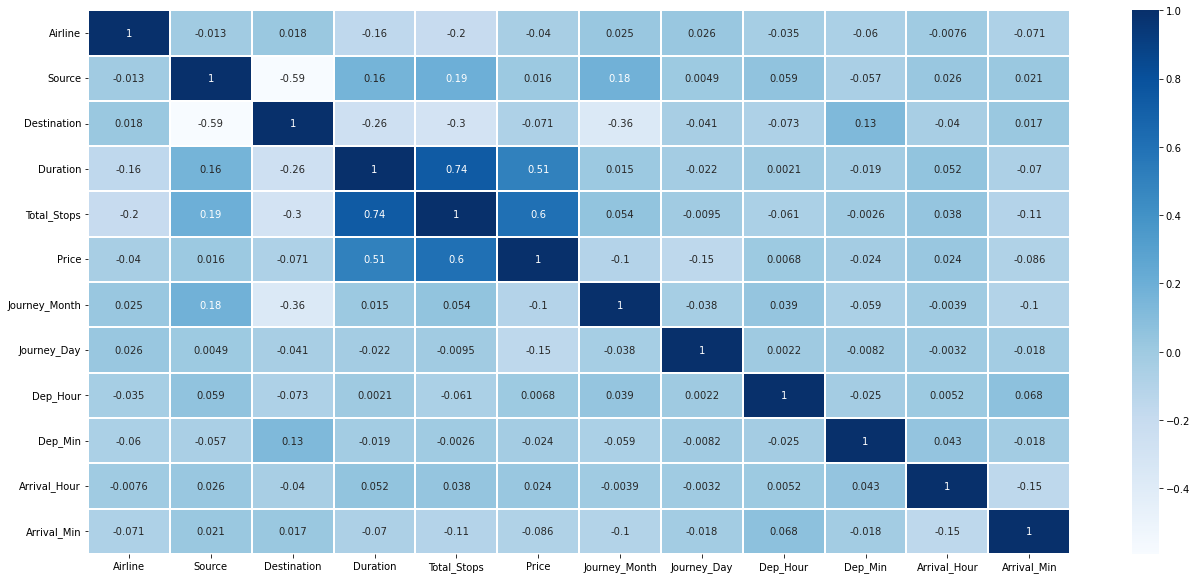

In [36]:
plt.figure(figsize=(22,10))
sns.heatmap(df.corr(),annot=True,linewidths = 2,cmap="Blues")
plt.show()

From above we can see that some Columns have High Correlation(>=0.6) b/w them these columns are:-
   1. Total Stops & Duration
   2. Total Stops & Price
   3. Destination & Source

CORRELATION with the PRICE Column

In [37]:
df.corr()['Price'].sort_values()

Journey_Day     -0.153774
Journey_Month   -0.103643
Arrival_Min     -0.086155
Destination     -0.071122
Airline         -0.039565
Dep_Min         -0.024458
Dep_Hour         0.006799
Source           0.015999
Arrival_Hour     0.024244
Duration         0.506480
Total_Stops      0.603897
Price            1.000000
Name: Price, dtype: float64

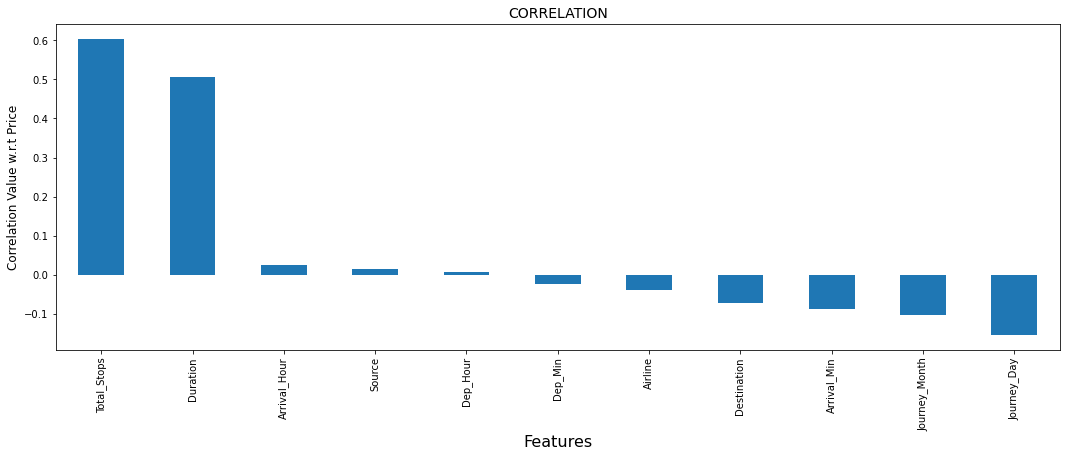

In [38]:
plt.figure(figsize=(18,6))
df.corr()['Price'].sort_values(ascending=False).drop(['Price']).plot(kind='bar')
plt.xlabel("Features",fontsize=16)
plt.ylabel("Correlation Value w.r.t Price",fontsize=12)
plt.title("CORRELATION",fontsize=14)
plt.show()

From above chart we can see that the Total_Stops & Duration Column have highest +ve correlation with the Target'PRICE' Column.

Whereas Journey_Day shows highest -ve correlation with PRICE.

# Treating Outliers

Splitting data into Target & Independent columns

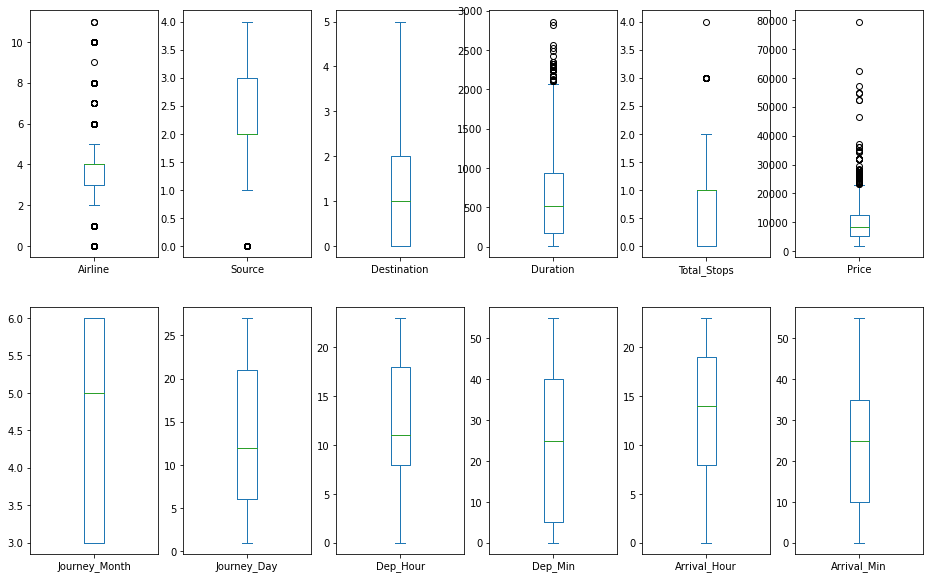

In [39]:
df.plot(kind='box',subplots=True,layout=(2,6),figsize=(16,10)) 
plt.show()

We can see that the Maximum outliers are presernt in PRICE column which is our Target Variable.

So, Not removing the Outliers from Independent variable columns as many of the columns are also in categorical in nature.

In [40]:
x=df.drop({'Price'},axis=1)         # Independent Columns

y=pd.DataFrame(df['Price'])     # Target Column

In [41]:
x.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,3,0,5,170,0,3,24,22,20,1,10
1,1,3,0,445,2,5,1,5,50,13,15
2,4,2,1,1140,2,6,9,9,25,4,25
3,3,3,0,325,1,5,12,18,5,23,30
4,3,0,5,285,1,3,1,16,50,21,35


In [42]:
y.head()

,Price
0,3897
1,7662
2,13882
3,6218
4,13302


# Treating Skewness

In [43]:
x.skew().sort_values(ascending=False)

Destination      1.244046
Duration         0.861411
Airline          0.731057
Total_Stops      0.317109
Dep_Min          0.167234
Journey_Day      0.118174
Dep_Hour         0.112924
Arrival_Min      0.110945
Arrival_Hour    -0.370146
Journey_Month   -0.387409
Source          -0.424023
dtype: float64

Taking Skewness threshold as +/- 0.5.

We can see that skewness is only present in Duration column. And all the rest columns are cotegorical in nature.

In [44]:
from scipy.stats import boxcox
x['Duration']=boxcox(x['Duration'],0.5)
x.skew()

Airline          0.731057
Source          -0.424023
Destination      1.244046
Duration         0.341341
Total_Stops      0.317109
Journey_Month   -0.387409
Journey_Day      0.118174
Dep_Hour         0.112924
Dep_Min          0.167234
Arrival_Hour    -0.370146
Arrival_Min      0.110945
dtype: float64

# Treating Multicollinearity

Checking Variance Inflation Factor(VIF)

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
def calc_vif(x):
    vif=pd.DataFrame()
    vif["Variables"]=x.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    return(vif)

In [47]:
calc_vif(x)

,Variables,VIF FACTOR
0,Airline,3.780780
1,Source,5.078702
2,Destination,2.474275
3,Duration,14.927086
4,Total_Stops,7.102172
5,Journey_Month,11.636261
6,Journey_Day,3.328470
7,Dep_Hour,5.502506
8,Dep_Min,2.694667
9,Arrival_Hour,4.580286


We can see that all the V.I.F. Values are around or under 10 which is acceptable. So not there is no Problem of Multicollinearity.

# Data Scaling

In [48]:
x.describe()

,Airline,Source,Destination,Duration,Total_Stops,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,3.966205,1.952256,1.436154,44.618199,0.824190,4.708575,13.509081,12.491013,24.409287,13.349186,24.690601
std,2.352090,1.177276,1.474845,19.971551,0.675229,1.164408,8.479363,5.748820,18.767801,6.859317,16.506808
min,0.000000,0.000000,0.000000,2.472136,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,2.000000,0.000000,24.076810,0.000000,3.000000,6.000000,8.000000,5.000000,8.000000,10.000000
50%,4.000000,2.000000,1.000000,43.607017,1.000000,5.000000,12.000000,11.000000,25.000000,14.000000,25.000000
75%,4.000000,3.000000,2.000000,58.991803,1.000000,6.000000,21.000000,18.000000,40.000000,19.000000,35.000000
max,11.000000,4.000000,5.000000,104.957936,4.000000,6.000000,27.000000,23.000000,55.000000,23.000000,55.000000


From above we can see that all the Columns are almost in same scale. Therefore not scaling the data further.

# Loading Testing Data

In [49]:
df_test = pd.read_excel("Flight_Price_Test_set.xlsx")   
df_test

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [50]:
sample = pd.read_excel("Flight_Price_Sample_submission.xlsx")   
sample

,Price
0,15998
1,16612
2,25572
3,25778
4,16934
...,...
2666,14046
2667,14086
2668,22720
2669,23544


Now performing all the techniques with the testing Data as well as done with the Training data.

# Treating Testing Data

In [51]:
# Handling Date_of_Journey Column

df_test['Date_of_Journey']=pd.to_datetime(df_test['Date_of_Journey'],format="%d/%m/%Y")
df_test['Journey_Month']=df_test['Date_of_Journey'].apply(lambda x:x.month)
df_test['Journey_Day']=df_test['Date_of_Journey'].apply(lambda x:x.day)
df_test.drop('Date_of_Journey',axis=1,inplace=True)

# Handling Dep_Time Column

df_test['Dep_Hour']=pd.to_datetime(df_test['Dep_Time']).apply(lambda x:x.hour)
df_test['Dep_Min']=pd.to_datetime(df_test['Dep_Time']).apply(lambda x:x.minute)
df_test.drop('Dep_Time',axis=1,inplace=True)

# Handling Arrival_Time Column

df_test['Arrival_Hour']=pd.to_datetime(df_test['Arrival_Time']).apply(lambda x:x.hour)
df_test['Arrival_Min']=pd.to_datetime(df_test['Arrival_Time']).apply(lambda x:x.minute)
df_test.drop('Arrival_Time',axis=1,inplace=True)

# Handling Duration Column
df_test['Duration'] = df_test['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

# Dropping Route & Additional_Info Column
df_test.drop({'Route','Additional_Info'},axis=1,inplace=True)

# Encoding the data
df_test['Airline']=le.fit_transform(df_test['Airline'])
df_test['Source']=le.fit_transform(df_test['Source'])
df_test['Destination']=le.fit_transform(df_test['Destination'])
df_test.replace({'non-stop':0 , '1 stop':1, '2 stops':2, '3 stops':3,'4 stops':4} , inplace=True)

df_test.head()

,Airline,Source,Destination,Duration,Total_Stops,Journey_Month,Journey_Day,Dep_Hour,Dep_Min,Arrival_Hour,Arrival_Min
0,4,2,1,655,1,6,6,17,30,4,25
1,3,3,0,240,1,5,12,6,20,10,20
2,4,2,1,1425,1,5,21,19,15,19,0
3,6,2,1,780,1,5,21,8,0,21,0
4,0,0,2,170,0,6,24,23,55,2,45


Treating skeweness of the Test Data

In [52]:
df_test.skew().sort_values(ascending=False)

Destination      1.263630
Duration         0.896103
Airline          0.483882
Total_Stops      0.321364
Journey_Day      0.199540
Dep_Min          0.128515
Arrival_Min      0.115267
Dep_Hour         0.093759
Journey_Month   -0.403700
Source          -0.424997
Arrival_Hour    -0.443166
dtype: float64

In [53]:
from scipy.stats import boxcox
df_test['Duration']=boxcox(df_test['Duration'],0.5)
df_test.skew()

Airline          0.483882
Source          -0.424997
Destination      1.263630
Duration         0.343881
Total_Stops      0.321364
Journey_Month   -0.403700
Journey_Day      0.199540
Dep_Hour         0.093759
Dep_Min          0.128515
Arrival_Hour    -0.443166
Arrival_Min      0.115267
dtype: float64

# Splitting the Data

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression 
lm = LinearRegression()

Finding out best random state

In [63]:
for i in range(0,200):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=i,test_size=0.22)
    lm.fit(x_train,y_train)
    pred_train = lm.predict(x_train)
    pred_test = lm.predict(x_test)
    if round(r2_score(y_train,pred_train)*100,1) == round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"the Model performs very well")
        print(f"For {i},the training accuracy is :- {r2_score(y_train,pred_train)*100}")
        print(f"For {i},the testing accuracy is :- {r2_score(y_test,pred_test)*100}")
        print(f"For {i},the Mean squared error is :- {mean_squared_error(y_test,pred_test)}")
        print("\n")

At random state 24 the Model performs very well
For 24,the training accuracy is :- 44.423567833990184
For 24,the testing accuracy is :- 44.36587643008967
For 24,the Mean squared error is :- 11782626.430797251


At random state 54 the Model performs very well
For 54,the training accuracy is :- 44.40333121560662
For 54,the testing accuracy is :- 44.449139704133366
For 54,the Mean squared error is :- 11455376.47721422


At random state 55 the Model performs very well
For 55,the training accuracy is :- 44.40235541999654
For 55,the testing accuracy is :- 44.40644957273426
For 55,the Mean squared error is :- 12447554.317726232


At random state 73 the Model performs very well
For 73,the training accuracy is :- 44.41689831916621
For 73,the testing accuracy is :- 44.36428405740467
For 73,the Mean squared error is :- 12484834.622778887


At random state 110 the Model performs very well
For 110,the training accuracy is :- 44.38250663388711
For 110,the testing accuracy is :- 44.38488228894375
For

From above we can see that Model is performing best at Random State = 54. Beacuse for random state=54 Model's testing accuracy is equal to Training accuracy. And Model is getting least mean squared error.

Therefore, using Random State = 54 for further working & Splitting the DataFrame.

In [64]:
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=54,test_size=0.22)

In [65]:
x_train.shape

(8331, 11)

In [66]:
x_test.shape

(2351, 11)

In [67]:
y_train.shape

(8331, 1)

In [68]:
y_test.shape

(2351, 1)

# Testing with Different Models

In [70]:
from sklearn.linear_model import LinearRegression 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [71]:
lm = LinearRegression()
svr = SVR()
dtc = DecisionTreeRegressor()
knn = KNeighborsRegressor()
ls  = Lasso(alpha=0.0001)
rd = Ridge(alpha=0.0001)

models = [lm,svr,dtc,knn,ls,rd]

for i in models:
    i.fit(x_train,y_train)
    pred_train = i.predict(x_train)
    pred_test = i.predict(x_test)
    print(f"For {i},the training accuracy is :- {r2_score(y_train,pred_train)*100}")
    print(f"For {i},the testing accuracy is :- {r2_score(y_test,pred_test)*100}")
    print(f"For {i},the Mean squared error is :- {mean_squared_error(y_test,pred_test)}")
    print("\n")

For LinearRegression(),the training accuracy is :- 44.40333121560662
For LinearRegression(),the testing accuracy is :- 44.449139704133366
For LinearRegression(),the Mean squared error is :- 11455376.47721422


For SVR(),the training accuracy is :- 8.51533114198848
For SVR(),the testing accuracy is :- 8.628670298709373
For SVR(),the Mean squared error is :- 18842066.08821558


For DecisionTreeRegressor(),the training accuracy is :- 97.19070682796198
For DecisionTreeRegressor(),the testing accuracy is :- 68.71031078684928
For DecisionTreeRegressor(),the Mean squared error is :- 6452378.376907699


For KNeighborsRegressor(),the training accuracy is :- 75.66011881273334
For KNeighborsRegressor(),the testing accuracy is :- 60.04333939558533
For KNeighborsRegressor(),the Mean squared error is :- 8239630.989655466


For Lasso(alpha=0.0001),the training accuracy is :- 44.403331215606215
For Lasso(alpha=0.0001),the testing accuracy is :- 44.44913987227024
For Lasso(alpha=0.0001),the Mean square

From above we can see that DecisionTreeRegressor() & KNeighborsRegressor() is permorming best for the Data among all other algorithms.

# Ensemble Techniques

Using various Bagging & Boosting Ensemble Algorithms to increase the model performance.

In [73]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [74]:
rf = RandomForestRegressor()
br = BaggingRegressor()
ad = AdaBoostRegressor()
gb = GradientBoostingRegressor()
ex = ExtraTreesRegressor()

models = [rf,br,ad,gb,ex]

for i in models:
    i.fit(x_train,y_train)
    pred_train = i.predict(x_train)
    pred_test = i.predict(x_test)
    print(f"For {i},the training accuracy is :- {r2_score(y_train,pred_train)*100}")
    print(f"For {i},the testing accuracy is :- {r2_score(y_test,pred_test)*100}")
    print(f"For {i},the Mean squared error is :- {mean_squared_error(y_test,pred_test)}")
    print("\n")

For RandomForestRegressor(),the training accuracy is :- 95.49375239121068
For RandomForestRegressor(),the testing accuracy is :- 80.76162356629743
For RandomForestRegressor(),the Mean squared error is :- 3967226.496307326


For BaggingRegressor(),the training accuracy is :- 94.48898222200293
For BaggingRegressor(),the testing accuracy is :- 79.58080428909575
For BaggingRegressor(),the Mean squared error is :- 4210728.204469059


For AdaBoostRegressor(),the training accuracy is :- 37.68683689884794
For AdaBoostRegressor(),the testing accuracy is :- 32.05805400879195
For AdaBoostRegressor(),the Mean squared error is :- 14010594.359449638


For GradientBoostingRegressor(),the training accuracy is :- 78.59578584678394
For GradientBoostingRegressor(),the testing accuracy is :- 76.70447185916885
For GradientBoostingRegressor(),the Mean squared error is :- 4803868.809005922


For ExtraTreesRegressor(),the training accuracy is :- 97.19068939867023
For ExtraTreesRegressor(),the testing accuracy

From above ensemble methods we can see that the RandomForestRegressor(), BaggingRegressor() & ExtraTreesRegressor() is performing well with the Data. Whereas RandomForestRegressor() is getting the Highest accuracy score.

# Cross-Validation of Algorithms

Checking cross_val_scores for all the Algorithms that are performing well to know the which Algorithm is actually working best for the the Model.

In [78]:
from sklearn.model_selection import cross_val_score
model = [dtc,knn,rf,br,ex]

for m in model:
    pred_test = m.predict(x_test)
    score = cross_val_score(m,x,y,cv=5)
    c_score = score.mean()
    print("For",m,"Cross Validation score is:-",c_score*100)
    print(f"The testing accuracy is :- {r2_score(y_test,pred_test)*100}")
    print("\n")

For DecisionTreeRegressor() Cross Validation score is:- 68.29606447968949
The testing accuracy is :- 68.71031078684928


For KNeighborsRegressor() Cross Validation score is:- 61.96960661488562
The testing accuracy is :- 60.04333939558533


For RandomForestRegressor() Cross Validation score is:- 80.70895327591728
The testing accuracy is :- 80.76162356629743


For BaggingRegressor() Cross Validation score is:- 78.59382191435917
The testing accuracy is :- 79.58080428909575


For ExtraTreesRegressor() Cross Validation score is:- 78.53508931051938
The testing accuracy is :- 77.61688993614054




Now from above we can confirm that RandomForestRegressor() is working Best for the data beacuse:-

   1. RandomForestRegressor() is getting Highest accuracy score among all the algorithms.
   2. Cross Val-Score is highest is case of RandomForestRegressor().
   3. Cross-Val Score & Accuracy score are almost equal for RandomForestRegressor().


Using RandomForestRegressor() as the Final Algorithm & Optimizaztion.

# Hyperparameter tuning

Using GridSearchCV for further Model optimization.

In [79]:
from sklearn.model_selection import GridSearchCV
rf = RandomForestRegressor()

In [80]:
grid_param = {'n_estimators':[50,100,200,300],'criterion':['squared_error', 'absolute_error', 'poisson'],'max_features':['auto', 'sqrt', 'log2'],'max_depth':[5,6,7,8,9]}

gd_sr = GridSearchCV(estimator=rf,param_grid=grid_param,scoring='accuracy',cv=5)

gd_sr.fit(x_train,y_train)

best_parameters = gd_sr.best_params_
print(best_parameters)

{'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50}


In [82]:
gd_sr.best_estimator_

RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=50)

Using these above parameters for Final training of the Model

In [83]:
rf = RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=50)

In [84]:
rf.fit(x_train,y_train)
pred_train = rf.predict(x_train)
pred_test = rf.predict(x_test)
print(f"For {rf},the training accuracy is :- {r2_score(y_train,pred_train)*100}")
print(f"For {rf},the testing accuracy is :- {r2_score(y_test,pred_test)*100}")
print(f"For {rf},the Mean squared error is :- {mean_squared_error(y_test,pred_test)}")

For RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=50),the training accuracy is :- 71.91778142293622
For RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=50),the testing accuracy is :- 70.83429655099258
For RandomForestRegressor(max_depth=5, max_features='auto', n_estimators=50),the Mean squared error is :- 6014382.341726309


In [85]:
rf = RandomForestRegressor()

In [86]:
rf.fit(x_train,y_train)
pred_train = rf.predict(x_train)
pred_test = rf.predict(x_test)
print(f"For {rf},the training accuracy is :- {r2_score(y_train,pred_train)*100}")
print(f"For {rf},the testing accuracy is :- {r2_score(y_test,pred_test)*100}")
print(f"For {rf},the Mean squared error is :- {mean_squared_error(y_test,pred_test)}")

For RandomForestRegressor(),the training accuracy is :- 95.39538934746729
For RandomForestRegressor(),the testing accuracy is :- 80.84725435453046
For RandomForestRegressor(),the Mean squared error is :- 3949568.21141263


We can see that the Model Performance has reduced from the Default Parameters of the Random Forest Regressor. Therefore using original parameters for model training.

# Cross-Validation of Best Model

In [89]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    score = cross_val_score(rf,x,y,cv=i)
    c_score = score.mean()
    print("At cv:-",i)
    print("Cross Validation score is:-",c_score*100)
    print("Accuracy Score of model is :-",r2_score(y_test,pred_test)*100)
    print("\n")

At cv:- 2
Cross Validation score is:- 79.07250749553711
Accuracy Score of model is :- 80.84725435453046


At cv:- 3
Cross Validation score is:- 78.89552364538991
Accuracy Score of model is :- 80.84725435453046


At cv:- 4
Cross Validation score is:- 79.83573867795141
Accuracy Score of model is :- 80.84725435453046


At cv:- 5
Cross Validation score is:- 80.69560818760857
Accuracy Score of model is :- 80.84725435453046


At cv:- 6
Cross Validation score is:- 80.59211323684076
Accuracy Score of model is :- 80.84725435453046


At cv:- 7
Cross Validation score is:- 80.29433958398752
Accuracy Score of model is :- 80.84725435453046


At cv:- 8
Cross Validation score is:- 80.70049967375961
Accuracy Score of model is :- 80.84725435453046


At cv:- 9
Cross Validation score is:- 80.48843024781941
Accuracy Score of model is :- 80.84725435453046




Accuracy score is closest & almost same to the Cross Val Score at cv = 5. So, Using cv=5 for final validation.

In [90]:
rf.fit(x_train,y_train)
pred_test=rf.predict(x_test)
score = cross_val_score(rf,x,y,cv=5)
c_score = score.mean()
print("For",rf,"Cross Validation score is:-",round(c_score*100))
print('Accuracy Score of',rf,'is:',round(r2_score(y_test,pred_test)*100))

For RandomForestRegressor() Cross Validation score is:- 81
Accuracy Score of RandomForestRegressor() is: 81


We can see that the Cross Val Score & Accuracy score are same. Hence there is no overfitting/underfitting.

# Saving the best Model

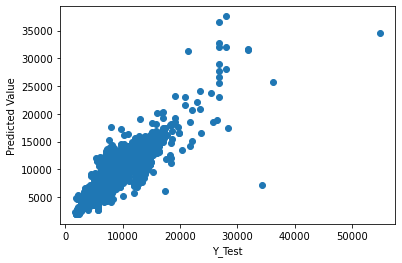

In [87]:
plt.scatter(x=y_test,y=pred_test)
plt.xlabel("Y_Test")
plt.ylabel("Predicted Value")
plt.show()

In [88]:
import pickle

filename = 'Flight_Price_Prediction.pkl'

pickle.dump(rf, open(filename,'wb')) 

# Conclusion

In [96]:
loaded_model = pickle.load(open('Flight_Price_Prediction.pkl','rb'))
result = loaded_model.score(x_train,y_train)
print(result)

0.9539538934746729


In [93]:
original=np.array(y_test).reshape(-1)
predicted=np.array(loaded_model.predict(x_test)).reshape(-1)
conclusion = pd.DataFrame({"Original":original,"Predicted":predicted}, index= range(len(original)))
conclusion

,Original,Predicted
0,9481,9199.770000
1,18211,12602.816667
2,10262,10291.510000
3,10844,13751.935333
4,5678,4723.767333
...,...,...
2346,3175,3578.860000
2347,13912,11665.770000
2348,2385,2444.620000
2349,12032,6961.569000
